In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [4]:
y_train[0]

9

In [7]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

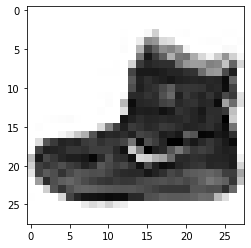

In [8]:
plt.imshow(X_train[0],cmap='Greys')

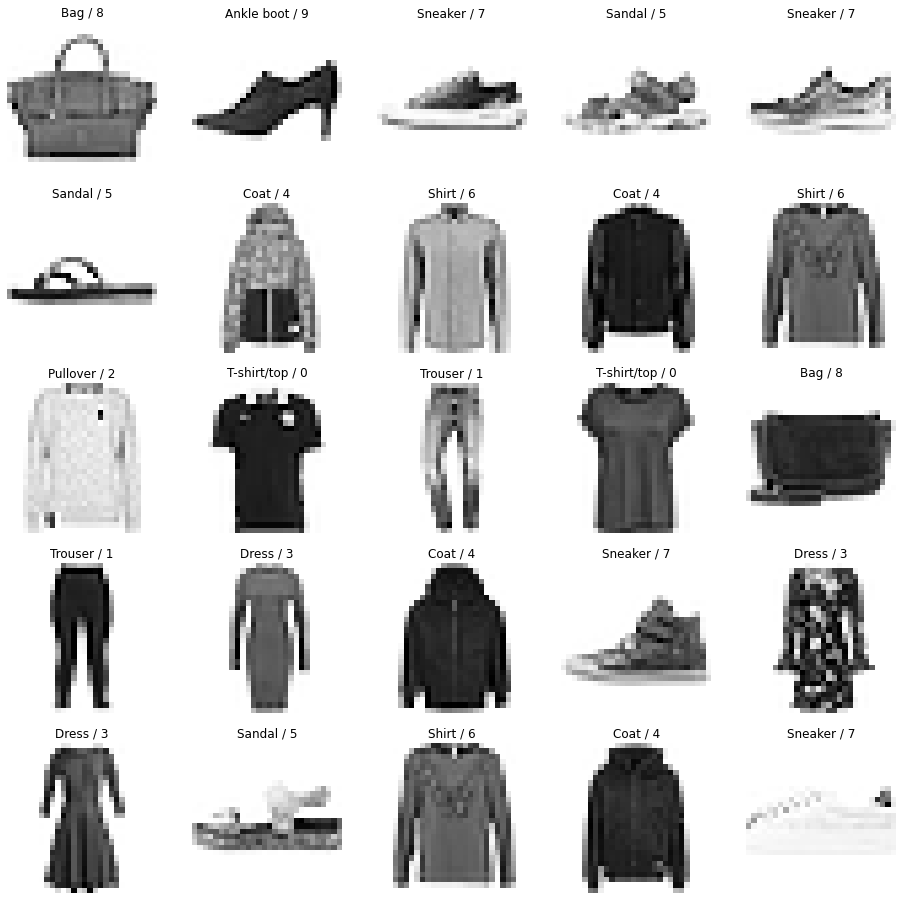

In [10]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [11]:
X_train.ndim

3

In [12]:
X_train = np.expand_dims(X_train,-1)

In [14]:
X_train.ndim

4

In [15]:
X_test=np.expand_dims(X_test,-1)

In [17]:
X_train = X_train/255
X_test= X_test/255

In [18]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [19]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [20]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/20
94/94 [==============================] - 19s 199ms/step - loss: 2.0384 - accuracy: 0.4274 - val_loss: 1.4863 - val_accuracy: 0.5819
Epoch 2/20
94/94 [==============================] - 18s 192ms/step - loss: 1.1324 - accuracy: 0.6464 - val_loss: 0.9341 - val_accuracy: 0.6802
Epoch 3/20
94/94 [==============================] - 18s 195ms/step - loss: 0.8390 - accuracy: 0.7079 - val_loss: 0.7851 - val_accuracy: 0.7080
Epoch 4/20
94/94 [==============================] - 18s 190ms/step - loss: 0.7392 - accuracy: 0.7327 - val_loss: 0.7187 - val_accuracy: 0.7329
Epoch 5/20
94/94 [==============================] - 18s 193ms/step - loss: 0.6873 - accuracy: 0.7482 - val_loss: 0.6807 - val_accuracy: 0.7396
Epoch 6/20
94/94 [==============================] - 18s 193ms/step - loss: 0.6514 - accuracy: 0.7597 - val_loss: 0.6546 - val_accuracy: 0.7531
Epoch 7/20
94/94 [==============================] - 18s 197ms/step - loss: 0.6248 - accuracy: 0.7698 - val_loss: 0.6180 - val_accuracy: 0.7734

In [23]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.31, 0.  , 0.56],
       [0.  , 0.  , 0.92, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.02, 0.  , 0.  , ..., 0.  , 0.85, 0.  ],
       [0.  , 0.99, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.  ]], dtype=float32)

In [24]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.4981 - accuracy: 0.8242


[0.49813607335090637, 0.8241999745368958]

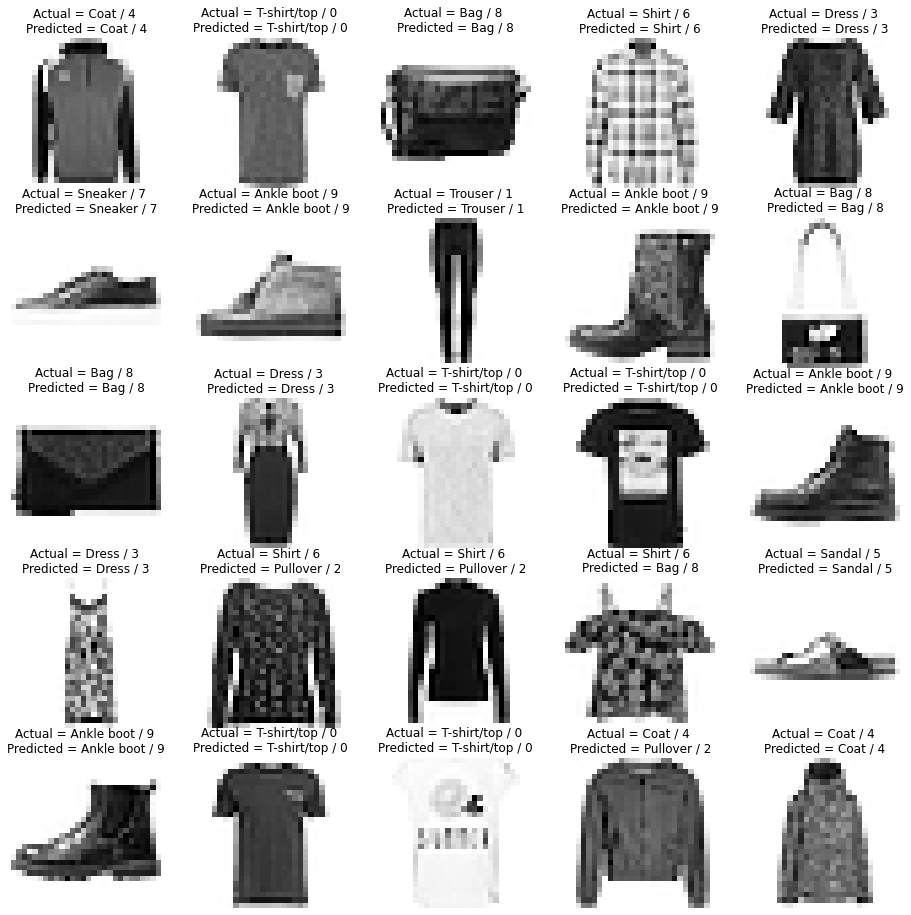

In [29]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

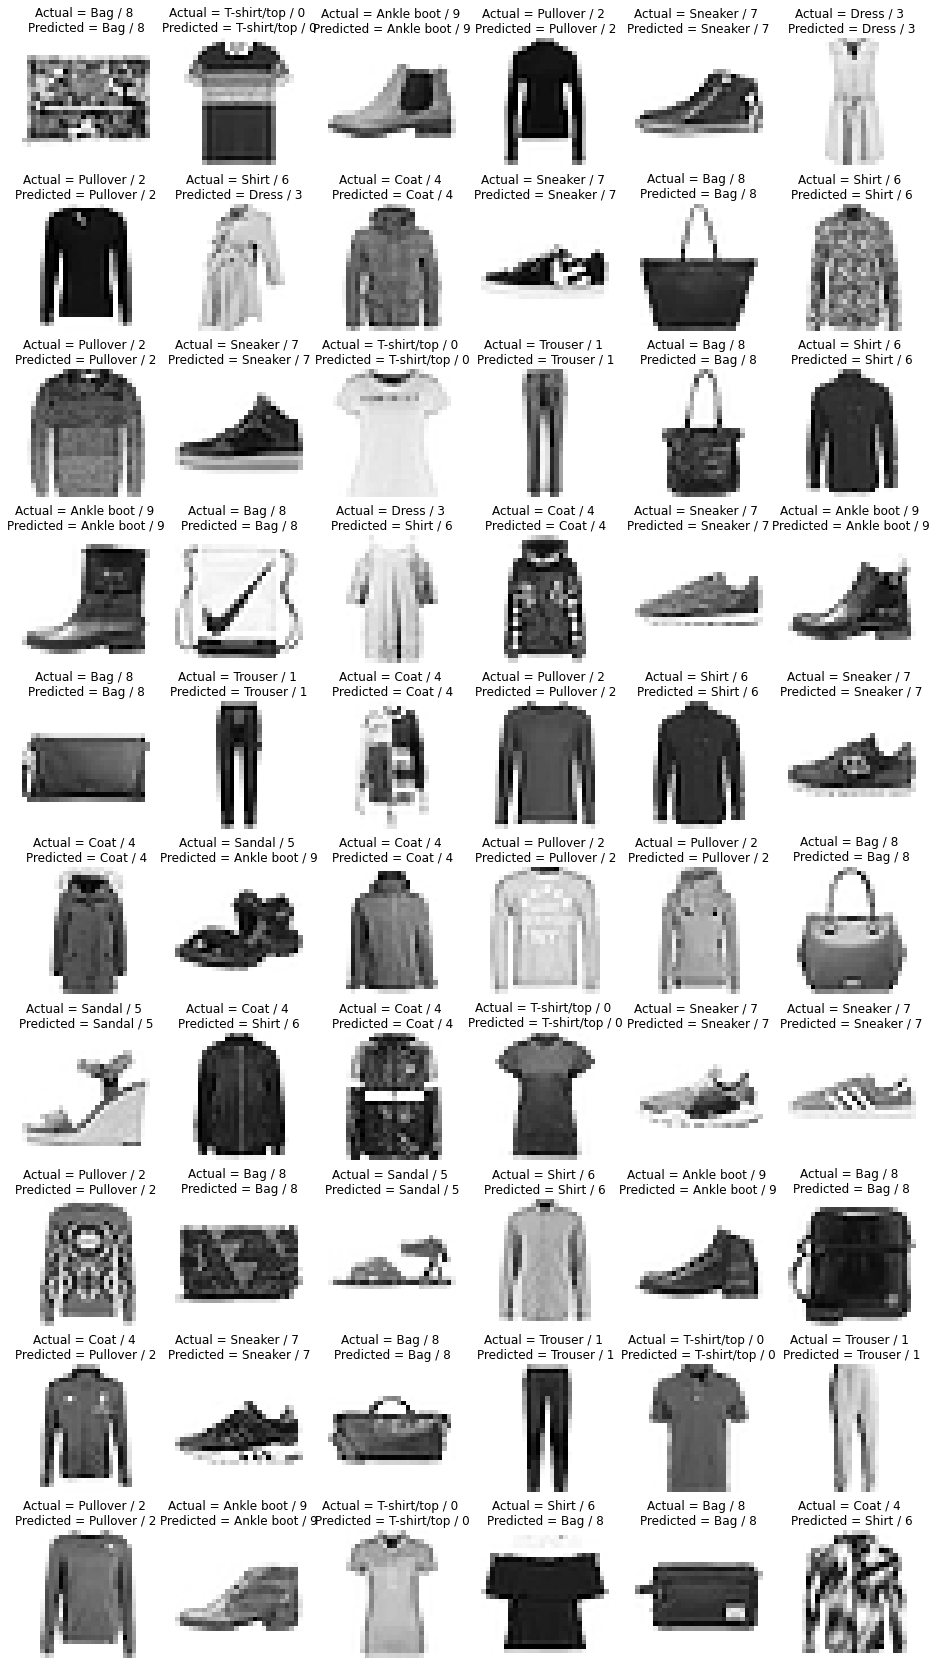

In [30]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.80      0.79      1000
     Trouser       0.97      0.94      0.95      1000
    Pullover       0.69      0.74      0.72      1000
       Dress       0.79      0.87      0.83      1000
        Coat       0.72      0.72      0.72      1000
      Sandal       0.91      0.94      0.92      1000
       Shirt       0.59      0.48      0.53      1000
     Sneaker       0.92      0.89      0.90      1000
         Bag       0.92      0.94      0.93      1000
  Ankle boot       0.92      0.94      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



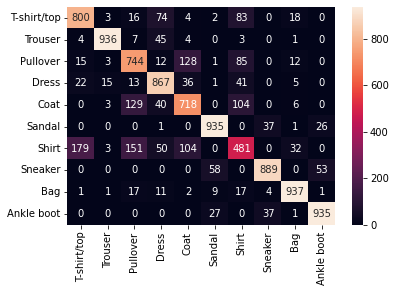

In [32]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [34]:
model.save('fashion_mnist_cnn_model.h5')

In [36]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
 
"""######## very complex model"""
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 24s 252ms/step - loss: 1.8921 - accuracy: 0.2850 - val_loss: 1.1875 - val_accuracy: 0.5174
Epoch 2/20
94/94 [==============================] - 24s 251ms/step - loss: 1.0516 - accuracy: 0.5792 - val_loss: 0.9098 - val_accuracy: 0.6379
Epoch 3/20
94/94 [==============================] - 24s 260ms/step - loss: 0.9169 - accuracy: 0.6450 - val_loss: 0.8285 - val_accuracy: 0.6776
Epoch 4/20
94/94 [==============================] - 23s 247ms/step - loss: 0.8330 - accuracy: 0.6834 - val_loss: 0.7530 - val_accuracy: 0.7138
Epoch 5/20
94/94 [==============================] - 23s 250ms/step - loss: 0.7697 - accuracy: 0.7093 - val_loss: 0.7005 - val_accuracy: 0.7279
Epoch 6/20
94/94 [==============================] - 23s 249ms/step - loss: 0.7290 - accuracy: 0.7222 - val_loss: 0.6639 - val_accuracy: 0.7401
Epoch 7/20
94/94 [==============================] - 23s 250ms/step - loss: 0.6863 - accuracy: 0.7357 - val_loss: 0.6299 - val_accuracy: 0.7556

[0.41230687499046326, 0.8500999808311462]